In [368]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import mnist_reader

X_train, y_train = mnist_reader.load_mnist('data/fashion', kind='train')
X_test, y_test = mnist_reader.load_mnist('data/fashion', kind='t10k')

In [369]:
y_train[0:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

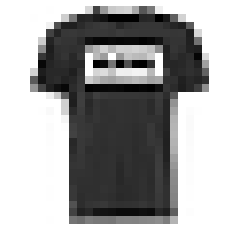

In [370]:
plt.imshow(X_train[1][:].reshape(28,28), cmap='binary')
plt.axis('off')
plt.show()

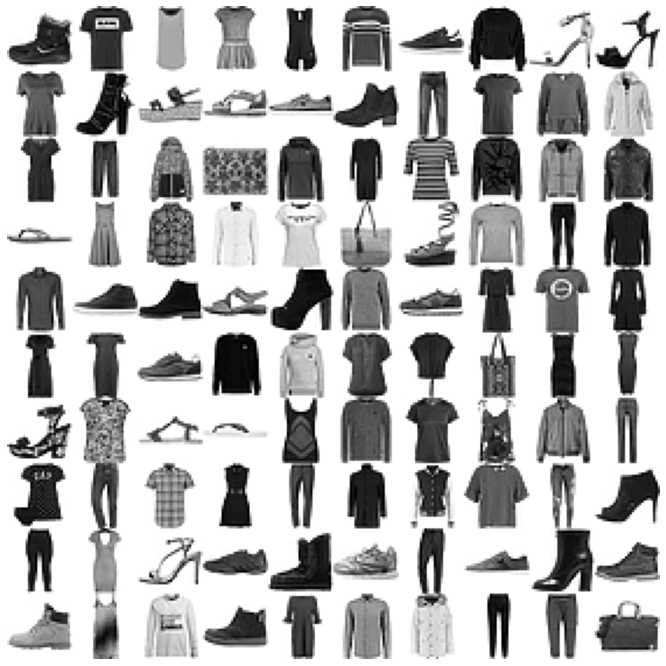

In [371]:
def plot_images_matrix(images, image_size, images_per_row):
    images = [image.reshape(image_size,image_size) for image in images]
    
    n_rows = (len(images)-1) // images_per_row + 1
    n_empty = n_rows * images_per_row - len(images)
    images.append(np.zeros((image_size, image_size * n_empty)))
    
    row_images = []
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    
    plt.imshow(image, cmap = mpl.cm.binary)
    plt.axis("off")

plt.figure(figsize=(12,12))
plot_images_matrix(X_train[:100], 28, 10)
plt.show()

In [372]:
y_train[20:30]

array([3, 1, 4, 8, 4, 3, 0, 2, 4, 4], dtype=uint8)

## Resolvemos con SGDClassifier();

In [425]:
from sklearn.linear_model import SGDClassifier
y_prueba_train = y_train == 9
y_prueba_test = y_test == 9

In [426]:
model_SGD = SGDClassifier(loss='log', random_state=55)
model_SGD.fit(X_train, y_prueba_train)

SGDClassifier(loss='log', random_state=55)

In [427]:
model_SGD.predict(X_test[0:20])

array([ True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False])

In [428]:
y_test[:20]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 7, 3, 4, 1, 2, 4, 8, 0],
      dtype=uint8)

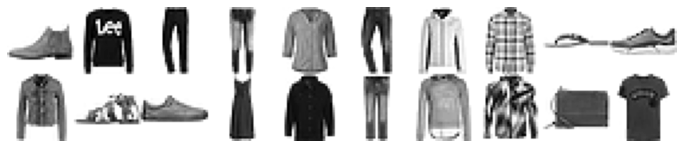

In [429]:
plt.figure(figsize=(12,12))
plot_images_matrix(X_test[0:20], 28, 10)
plt.show()

In [430]:
from  sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

In [431]:
y_test_predicted_SGD = model_SGD.predict(X_test)
confusion_matrix(y_prueba_test , y_test_predicted_SGD)

array([[8923,   77],
       [ 104,  896]])

In [432]:
from sklearn.metrics import precision_score, recall_score

In [433]:
precision_score(y_prueba_test, y_test_predicted_SGD)

0.920863309352518

In [434]:
recall_score(y_prueba_test, y_test_predicted_SGD)

0.896

In [435]:
from  sklearn.metrics import f1_score

In [436]:
f1_score(y_prueba_test, y_test_predicted_SGD)

0.9082615306639635

## Resolvemos con LogisticRegression()

In [437]:
from sklearn.linear_model import LogisticRegression

In [438]:
model_logistic = LogisticRegression(C= 10**10)

In [439]:
model_logistic.fit(X_train,y_prueba_train)

/home/senior/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=10000000000)

In [440]:
y_test_predicted_logistic = model_logistic.predict(X_test)

In [441]:
y_test_predicted[:10]

array([False, False,  True,  True, False,  True, False, False, False,
       False])

In [442]:
y_test[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=uint8)

In [443]:
confusion_matrix(y_prueba_test , y_test_predicted_logistic)

array([[8911,   89],
       [  75,  925]])

In [444]:
precision_score(y_prueba_test, y_test_predicted_logistic)

0.9122287968441815

In [445]:
recall_score(y_prueba_test, y_test_predicted_logistic)

0.925

In [446]:
f1_score(y_prueba_test, y_test_predicted_logistic)

0.9185700099304868

## Comparar precisión y recall en ambos

### SGDClassifier();

In [447]:
precision_score(y_prueba_test, y_test_predicted_SGD)

0.920863309352518

In [448]:
recall_score(y_prueba_test, y_test_predicted_SGD)

0.896

### LogisticRegression()

In [449]:
precision_score(y_prueba_test, y_test_predicted_logistic)

0.9122287968441815

In [450]:
recall_score(y_prueba_test, y_test_predicted_logistic)

0.925